In [1]:
# Dependencies and Setup
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the data into the pitch_df dataframe (DF) and viewing it
pitch_df = pd.read_csv('Resources/pitch_data.csv')
pitch_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0


In [3]:
# creates a list of the diffrent pitch types from the main data
pitch_types = pitch_df['Pitch_Type'].unique()

In [4]:
#

# sets up the data frames
pitch_df['Theoretical_Call'] = ''
pitch_df['Accurate'] = ''
pitch_df['Strike'] = ''

# innerates through the data with a for, if , else set of loops to figure out if the pitch 
#         should have been called as it was called.
for i, row in pitch_df.iterrows():
    pitch_x = abs(row['Pitch_X'])
    pitch_y = abs(row['Pitch_Y'])
    if (pitch_x > 100) or (pitch_y > 100):
        pitch_df.loc[i, 'Theoretical_Call'] = 'Ball'
        pitch_df.loc[i, 'Strike'] = False
    else:
        pitch_df.loc[i, 'Theoretical_Call'] = 'Strike'
        pitch_df.loc[i, 'Strike'] = True
    if pitch_df.loc[i, 'Called Ball/Strike'] == pitch_df.loc[i, 'Theoretical_Call']:
        pitch_df.loc[i, 'Accurate'] = True
    else:
        pitch_df.loc[i, 'Accurate'] = False

# view the first 5 rows of the dataframe generated
pitch_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed,Theoretical_Call,Accurate,Strike
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0,Ball,True,False
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0,Strike,True,True
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0,Ball,True,False
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0,Ball,True,False
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0,Ball,True,False


In [5]:
# set the average[mean] of the Accurate field to pitch_df
pitch_df['Accurate'].mean()

0.9104095563139932

/Users/RunforrrestruN/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


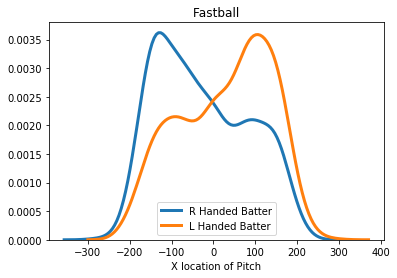

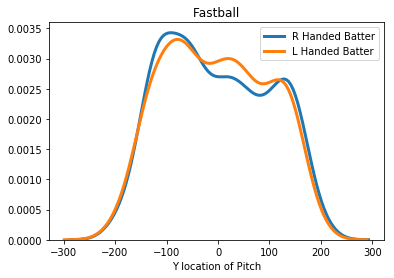

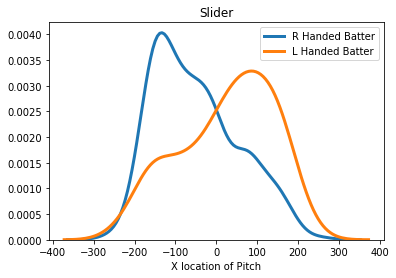

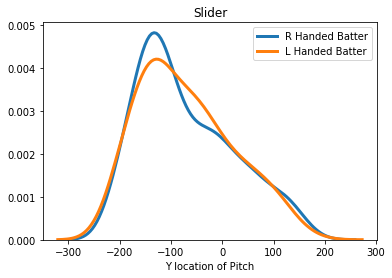

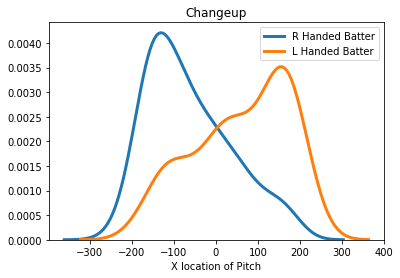

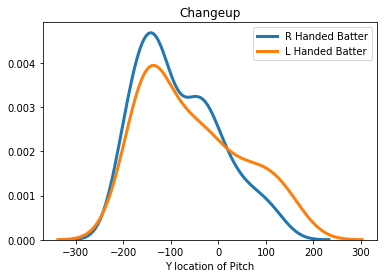

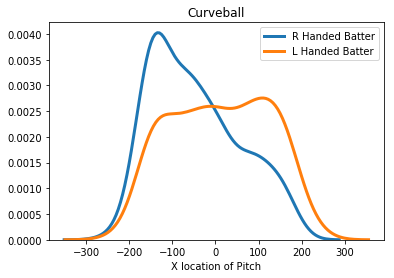

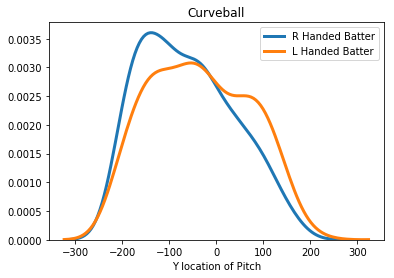

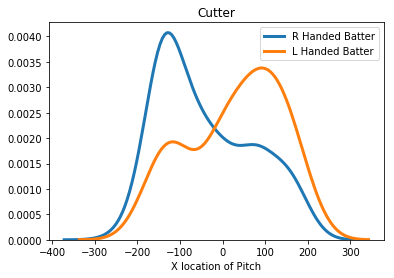

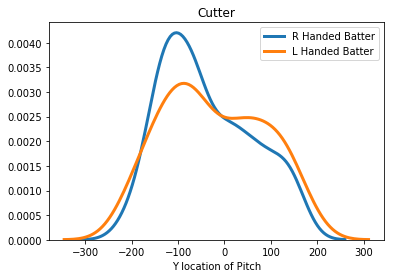

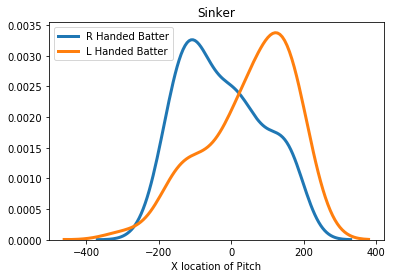

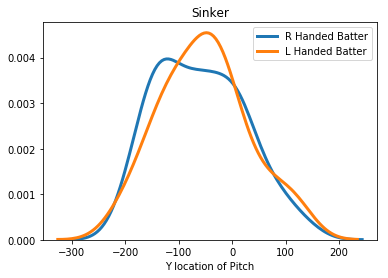

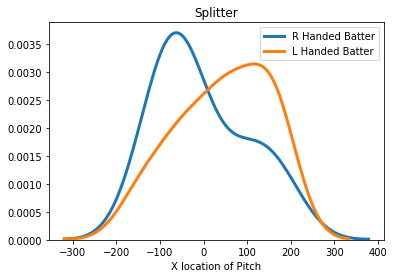

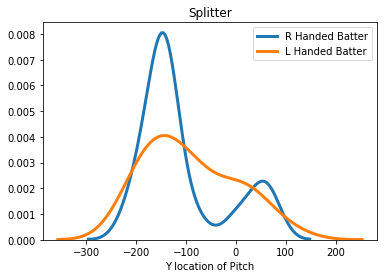

In [6]:
# create distplot for each type of pitch

# set and Dependency for seaborn
import seaborn as sns

# set up a DF for each type of pitch
pitch_dictionary = {'FA': 'Fastball',
                    'SI': 'Sinker',
                    'CT': 'Cutter',
                    'CU': 'Curveball',
                    'SL': 'Slider',
                    'CH': 'Changeup',
                    'KN': 'Knuckleball',
                    'SP': 'Splitter',
                    'SC': 'Screwball',
                    'FO': 'Forkball',
                    'IB': 'Intentional Ball',
                    'PI': 'Pitchout',}


# for loop that looks for the X/Y coordinates  for every type of pitch and 
#         creates a distplot for each type of pitch that includes every pitch of that type of pitch
#         (note that there is a unique distplot for each type of pitch for both the X and the Y coordinates)
#         The distplot's are then output to individual files in the images subfolder


for pitch_type in pitch_types:
    plt.figure()
    pitch_string = pitch_dictionary[pitch_type]
    pitch_df_pitch = pitch_df.loc[pitch_df['Pitch_Type'] == pitch_type]
    pitches_x_right = pitch_df_pitch.loc[pitch_df_pitch['Batter_Hand'] == 'R']['Pitch_X']
    pitches_x_left = pitch_df_pitch.loc[pitch_df_pitch['Batter_Hand'] == 'L']['Pitch_X']
    sns.distplot(pitches_x_right, hist=False, kde=True,
                 kde_kws={'linewidth': 3},
                 label='R Handed Batter')
    sns.distplot(pitches_x_left, hist=False, kde=True,
                 kde_kws={'linewidth': 3},
                 label='L Handed Batter')
    plt.title(pitch_string)
    plt.xlabel('X location of Pitch')
    plt.savefig(f'Images/{pitch_string}_x_pdf.png')
    plt.figure()
    pitches_y_right = pitch_df_pitch.loc[pitch_df_pitch['Batter_Hand'] == 'R']['Pitch_Y']
    pitches_y_left = pitch_df_pitch.loc[pitch_df_pitch['Batter_Hand'] == 'L']['Pitch_Y']
    sns.distplot(pitches_y_right, hist=False, kde=True,
                 kde_kws={'linewidth': 3},
                 label='R Handed Batter')
    sns.distplot(pitches_y_left, hist=False, kde=True,
                 kde_kws={'linewidth': 3},
                 label='L Handed Batter')
    plt.title(pitch_string)
    plt.xlabel('Y location of Pitch')
    plt.savefig(f'Images/{pitch_string}_y_pdf.png')

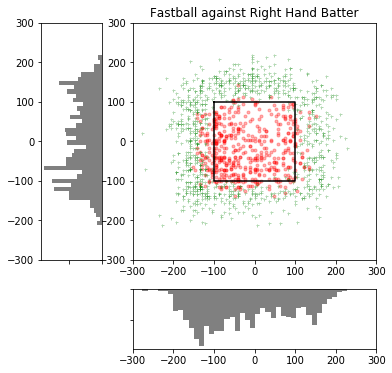

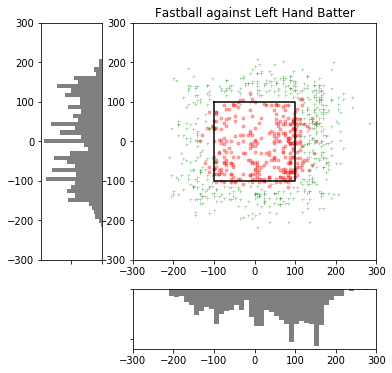

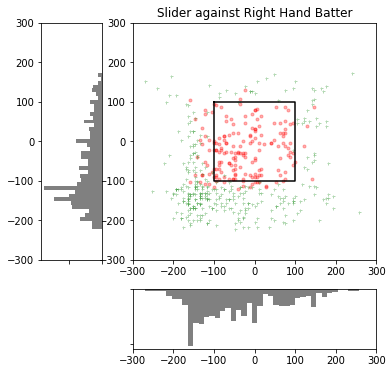

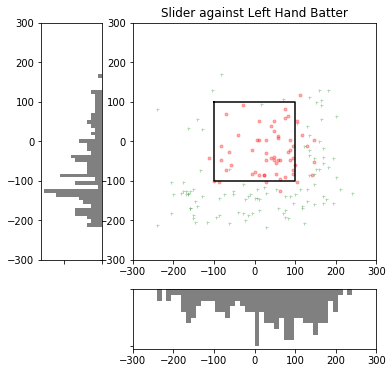

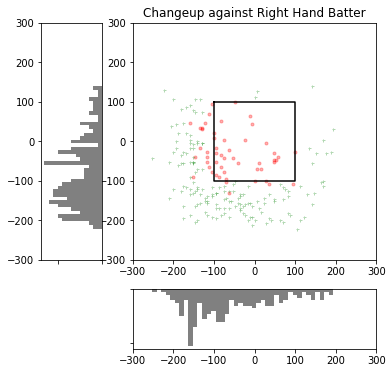

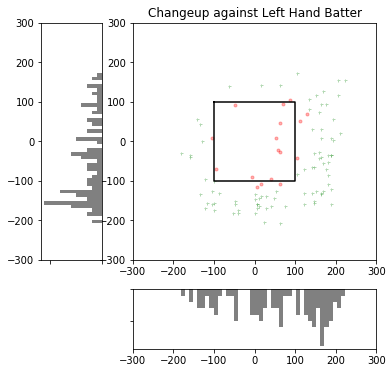

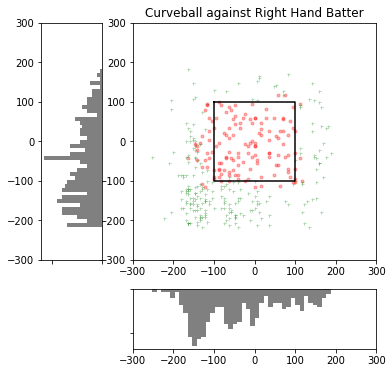

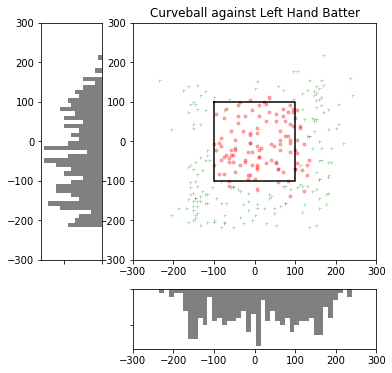

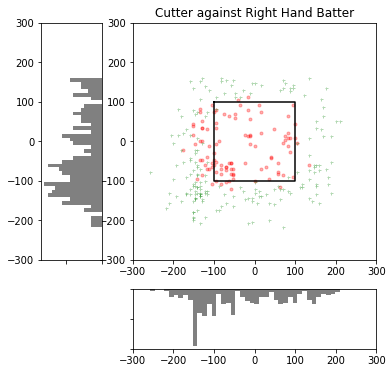

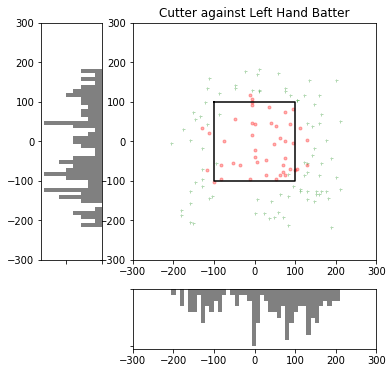

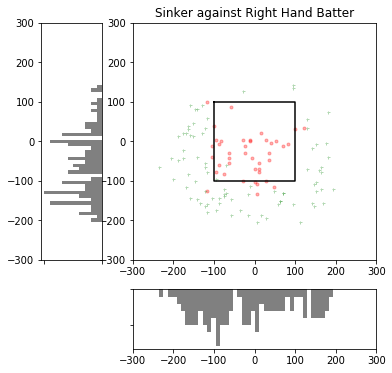

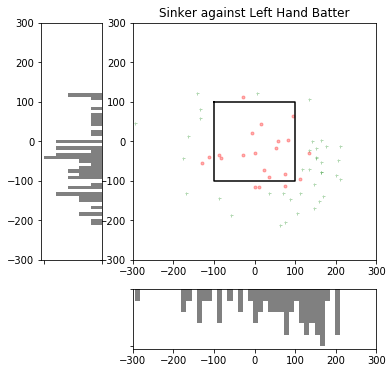

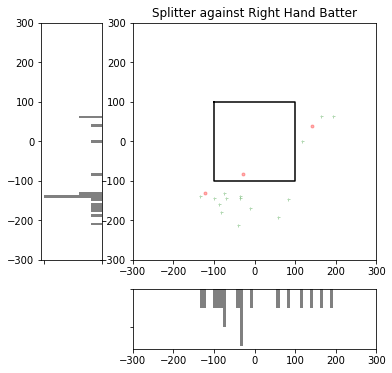

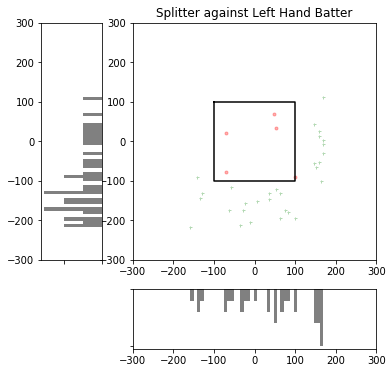

In [7]:
# create a scatter plot with histograms on the sides for pitches for each pitch type

# setup the DF's
hands = ['R', 'L']
strikezone_x = [-100, -100, 100, 100, -100]
strikezone_y = [100, -100, -100, 100, 100]


# for loop that looks through each type of pitch type and generates a scatter plot of where in the X/Y axis the pitch was.
#     Then add a histogram for both the X and Y axis to show the amount of pitches within that range
#     This is done for each type of pitch and both left and right handed batters
#     The charts are then output to individual files in the images subfolder

for i in range(len(pitch_types)):
    pitch_type = pitch_types[i]
    pitch_type_string = pitch_dictionary[pitch_type]
    for j in range(2):
        batter_hand = hands[j]
        batter_hand_string = 'Right Hand Batter' if batter_hand == 'R' else 'Left Hand Batter'
        pitch_df_pitch = pitch_df.loc[pitch_df['Pitch_Type'] == pitch_type]
        pitch_df_pitch_batter = pitch_df_pitch[pitch_df_pitch['Batter_Hand'] == batter_hand]
        fig = plt.figure(figsize=(6, 6))
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)
        main_ax = fig.add_subplot(grid[:-1, 1:])
        y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
        x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
        strikes = pitch_df_pitch_batter.loc[pitch_df_pitch_batter['Called Ball/Strike'] == 'Strike']
        balls = pitch_df_pitch_batter.loc[pitch_df_pitch_batter['Called Ball/Strike'] == 'Ball']
        x = pitch_df_pitch_batter['Pitch_X']
        y = pitch_df_pitch_batter['Pitch_Y']
        x_strike = strikes['Pitch_X']
        y_strike = strikes['Pitch_Y']
        x_ball = balls['Pitch_X']
        y_ball = balls['Pitch_Y']

        # scatter points on the main axes
        # plt.title(f'{pitch_type} against {batter_hand_string}')
        main_ax.plot(x_strike, y_strike, 'or', markersize=3, alpha=0.3)
        main_ax.plot(x_ball, y_ball, '+g', markersize=3, alpha=0.3)
        main_ax.plot(strikezone_x, strikezone_y, 'k')
        main_ax.set_xlim(-300, 300)
        main_ax.set_ylim(-300, 300)
        
        main_ax.set_title(f'{pitch_type_string} against {batter_hand_string}')

        # histogram on the attached axes
        x_hist.hist(x, 40, histtype='stepfilled',
                    orientation='vertical', color='gray')
        x_hist.invert_yaxis()
        x_hist.set_xlim(-300, 300)

        y_hist.hist(y, 40, histtype='stepfilled',
                    orientation='horizontal', color='gray')
        y_hist.invert_xaxis()
        y_hist.set_ylim(-300, 300)
        
        plt.savefig(f'Images/{pitch_type_string}_{batter_hand}.png')

In [8]:
# create a DF that has the umpire (as the index) and the accuracy (Accurate) as the only field 
#     for use in the Umpire Accuracy bar chart

ump_group = pitch_df.groupby('Umpire')
ump_accuracy = ump_group['Accurate'].mean()
ump_accuracy

Umpire
Adrian Johnson        0.885135
Alan Porter           0.911765
Angel Hernandez       0.920290
Brian Gorman          0.902098
Chad Fairchild        0.937008
Chris Conroy          0.926471
Chris Guccione        0.873377
Cory Blaser           0.870748
Dan Bellino           0.906475
Gary Cederstrom       0.937888
Gerry Davis           0.952756
Greg Gibson           0.938462
Hunter Wendelstedt    0.883871
James Hoye            0.918605
Jeff Nelson           0.919643
Jerry Layne           0.923077
Jim Wolf              0.926357
Joe West              0.920863
Kerwin Danley         0.857759
Lance Barksdale       0.882979
Mark Carlson          0.962963
Mike Muchlinski       0.891304
Mike Winters          0.883117
Scott Barry           0.888060
Ted Barrett           0.929504
Tim Timmons           0.931507
Tom Hallion           0.929078
Vic Carapazza         0.878788
Name: Accurate, dtype: float64

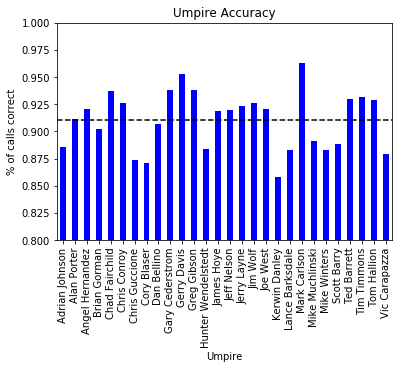

In [9]:
# create the Umpire Accuracy bar chart and save to the image subfolder
# this chart shows the percentage of accurate calls by umpire

ump_accuracy.plot(kind='bar', color='b')
plt.axhline(pitch_df['Accurate'].mean(), linestyle='--', color='k')
plt.ylim([0.8, 1])
plt.title('Umpire Accuracy')
plt.ylabel('% of calls correct')
plt.savefig('Images/umpire_accuracy.png')

In [10]:
# creates a DF that is grouped by both Umpire and the Home/Away fields based on the accuracy (Accurate) as the only field
# for the Umpire Accuracy Home/Away bar chart

ump_team_group = pitch_df.groupby(['Umpire', 'Home/Away'])
ump_team_accuracy = ump_team_group['Accurate'].mean()
ump_team_accuracy

Umpire              Home/Away
Adrian Johnson      Away         0.910448
                    Home         0.864198
Alan Porter         Away         0.904110
                    Home         0.920635
Angel Hernandez     Away         0.898734
                    Home         0.949153
Brian Gorman        Away         0.925000
                    Home         0.873016
Chad Fairchild      Away         0.952000
                    Home         0.922481
Chris Conroy        Away         0.967742
                    Home         0.891892
Chris Guccione      Away         0.847682
                    Home         0.898089
Cory Blaser         Away         0.885057
                    Home         0.850000
Dan Bellino         Away         0.887500
                    Home         0.932203
Gary Cederstrom     Away         0.942857
                    Home         0.928571
Gerry Davis         Away         0.964912
                    Home         0.942857
Greg Gibson         Away         0.968750
    

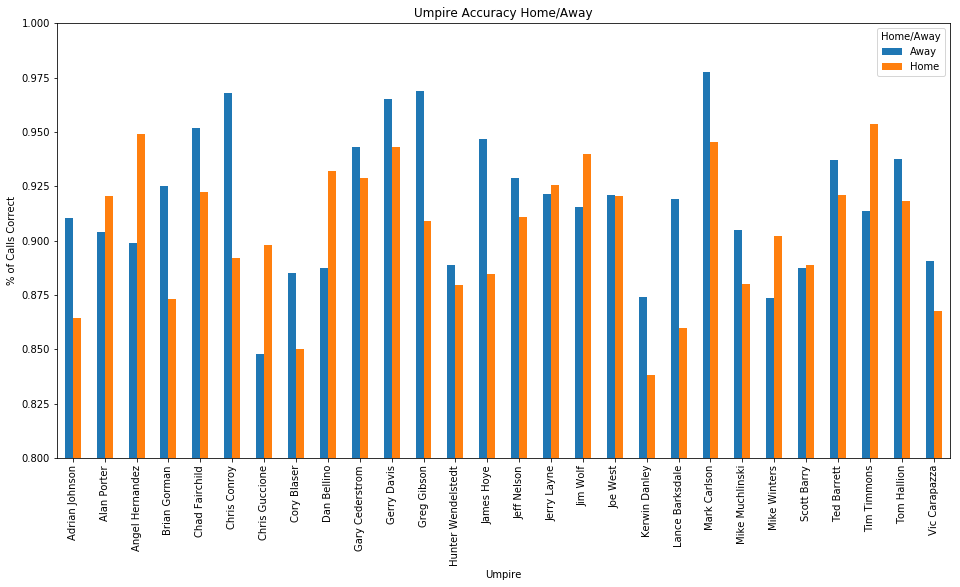

In [11]:
# create the Umpire Accuracy Home/Away bar chart and save to the image subfolder
# this chart shows the percentage of accurate calls by umpire split up by home and away

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

ump_team_accuracy.unstack().plot(kind='bar')
plt.ylim([0.8, 1.0])
plt.title('Umpire Accuracy Home/Away')
plt.ylabel('% of Calls Correct')
plt.savefig('Images/ump_accuracy_home_away.png')

In [12]:
# creates a DF that is the average(mean) of accurate calls based on the Home/Away field from the ump_team_group

team_group = pitch_df.groupby('Home/Away')
team_accuracy = team_group['Accurate'].mean()
team_accuracy

Home/Away
Away    0.915764
Home    0.904328
Name: Accurate, dtype: float64

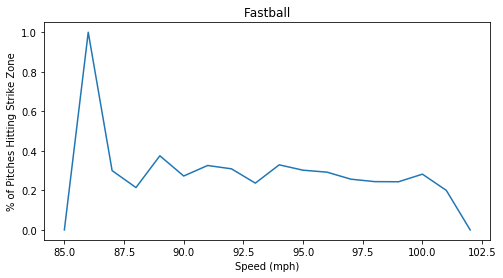

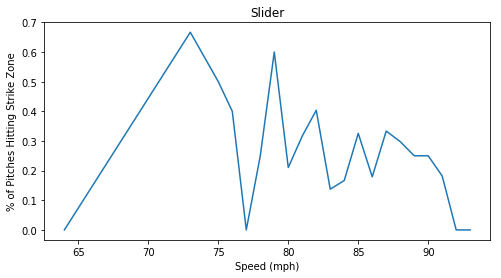

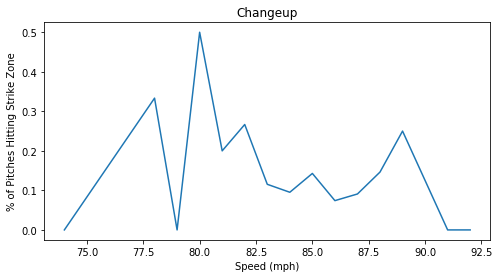

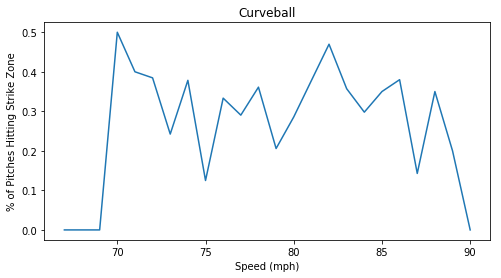

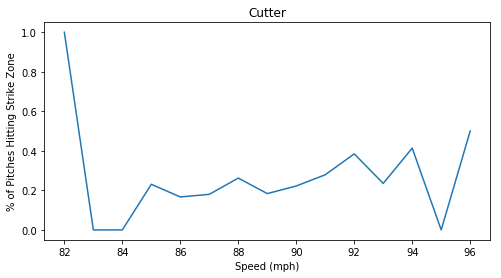

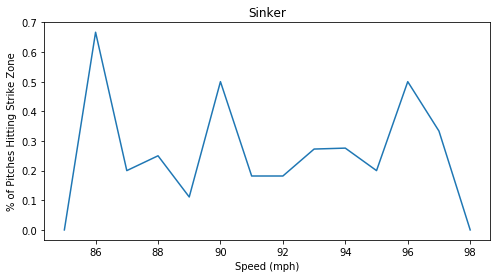

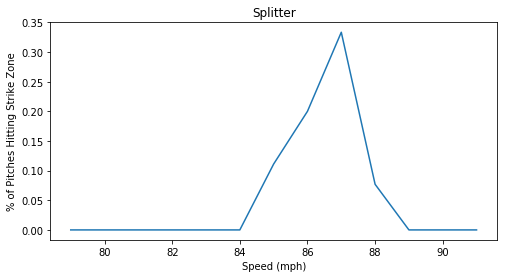

In [13]:
# create the % of Pitches Hitting Strike Zone line charts and saves them to the image subfolder
# these charts show the percentage of pitches are within the strike zone based on the speed of the pitch, 
#     and the charts are broken out by pitch type
#     The charts are then output to individual files in the images subfolder

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

for pitch_type in pitch_types:
    plt.figure()
    pitch_string = pitch_dictionary[pitch_type]
    pitch_df_pitch = pitch_df.loc[pitch_df['Pitch_Type'] == pitch_type]
    pitch_speed_group = pitch_df_pitch.groupby('Pitch_Speed')
    pitch_speed_strike_accuracy = pitch_speed_group['Strike'].mean()
    pitch_speed_strike_accuracy.plot(kind='line')
    plt.title(pitch_string)
    plt.ylabel('% of Pitches Hitting Strike Zone')
    plt.xlabel('Speed (mph)')
    plt.savefig(f'Images/{pitch_string}_speed.png')

In [14]:
# view the maximum speed of a pitch
pitch_df['Pitch_Speed'].max()

102.0

In [15]:
# view the slowest speed of a pitch
pitch_df['Pitch_Speed'].min()

64.0

In [16]:
# set up bins for each grouping of speeds, and the names of those bins

speed_bins = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
group_names = ["<65", "65-70", "70-75", "75-80", "80-85", "85-90", "90-95", "95-100", ">100"]

# add the field "speed_group" to the DF based on the bins set up above
pitch_df['Speed_Group'] = pd.cut(pitch_df['Pitch_Speed'], speed_bins, labels=group_names)
pitch_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed,Theoretical_Call,Accurate,Strike,Speed_Group
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0,Ball,True,False,90-95
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0,Strike,True,True,85-90
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0,Ball,True,False,85-90
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0,Ball,True,False,90-95
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0,Ball,True,False,90-95


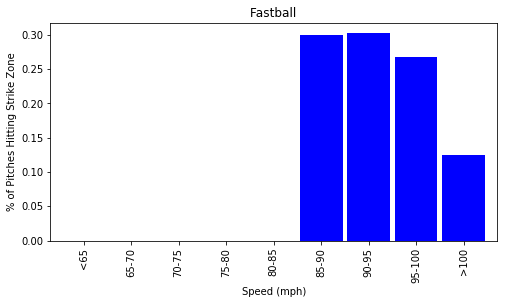

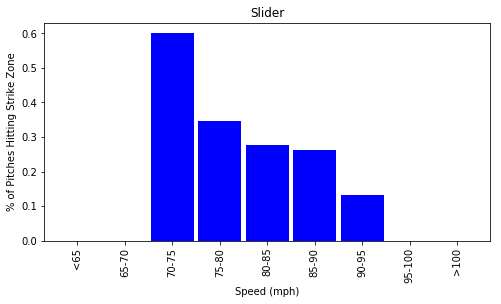

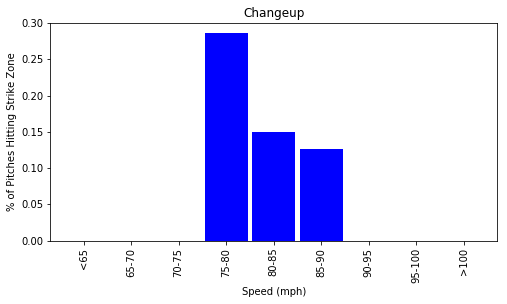

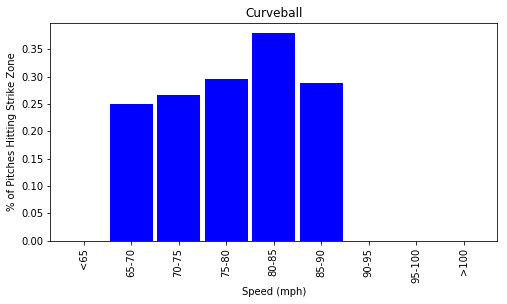

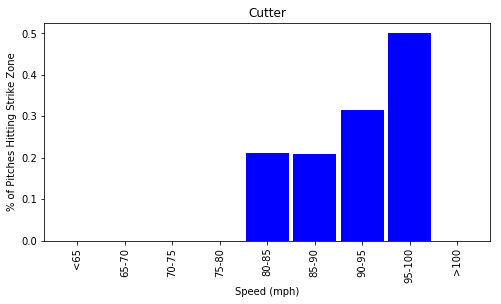

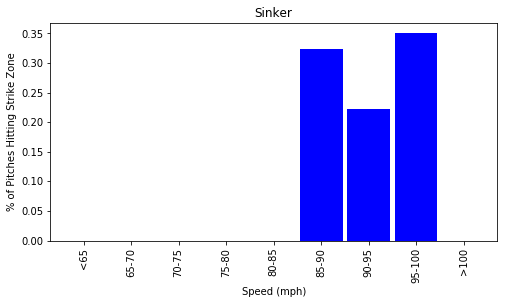

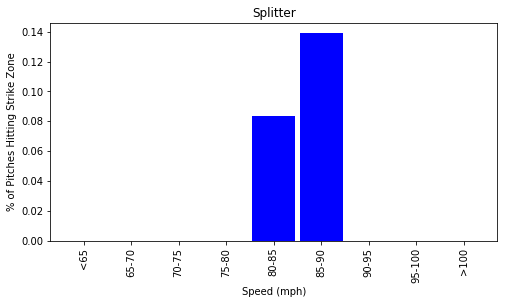

In [28]:
# creates the bar charts for the percentage of Pitches Hitting Strike Zone broken out by the pitch speed bins we set up above
#     The charts are then output to individual files in the images subfolder

for pitch_type in pitch_types:
    plt.figure()
    pitch_string = pitch_dictionary[pitch_type]
    pitch_df_pitch = pitch_df.loc[pitch_df['Pitch_Type'] == pitch_type]
    pitch_speed_group = pitch_df_pitch.groupby('Speed_Group')
    pitch_speed_strike_accuracy = pitch_speed_group['Strike'].mean()
    pitch_speed_strike_accuracy.plot(kind='bar', color='blue', width=0.9)
    plt.title(pitch_string)
    plt.ylabel('% of Pitches Hitting Strike Zone')
    plt.xlabel('Speed (mph)')
    plt.savefig(f'Images/{pitch_string}_speed_grouped.png')

In [52]:
# setup data for the boxplot for pitch speed(y) for each type of pitch type (x)

# set up paramiters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

pitch_df['Pitch_Sting'] = ''

# irrearate through the data based on the pitch type and pitch speed bins
for i, row in pitch_df.iterrows():
    pitch_df.loc[i, 'Pitch_String'] = pitch_dictionary[row['Pitch_Type']]

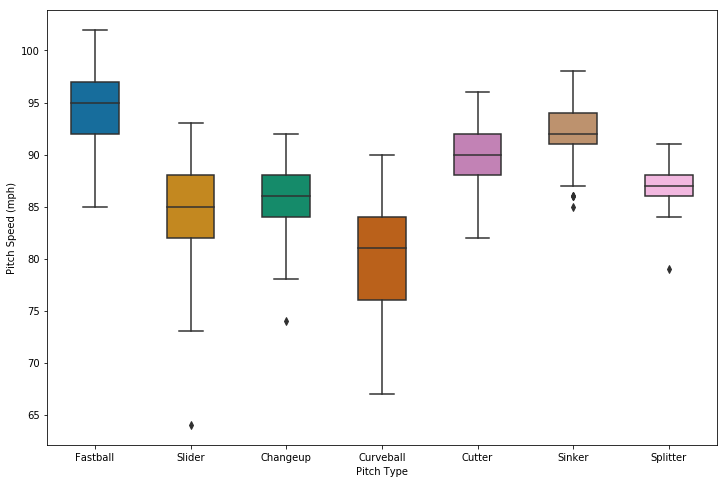

In [56]:
# plot the boxplot for pitch speed(y) for each type of pitch type (x)
# the black line within a box is the median
# The box represents the interquartile range of the data, in other words, the speed of 
#         the majority of the pitches occur for that pitch type
# The "T" lines below and above the box represent the first and third quartiles respectively
# The diamond marks represent the outliers

bplot = sns.boxplot(y='Pitch_Speed', x='Pitch_String', 
                    data=pitch_df, 
                    width=0.5,
                    palette="colorblind")
plt.ylabel('Pitch Speed (mph)')
plt.xlabel('Pitch Type')
plt.savefig('Images/pitch_boxplot.png')